In [116]:
import numpy as np
def gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [int((val-1.)/2) for val in shape]
    #print(m,n)
    gauss=np.zeros(shape,np.float32)
    for i in range(-m, m+1):
        for j in range(-n, n+1):
          x1=2*np.pi*(sigma**2)
          x2=np.exp(-(i**2 + j**2)/(2* sigma**2))
          gauss[i+m,j+n]=(1/x1)*(x2)
    #print(gauss)
    return gauss


In [117]:


def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [118]:
def normalize(img):
    ''' Function to normalize an input array to 0-1 '''
    img_min = img.min()
    img_max = img.max()
    return (img - img_min) / (img_max - img_min)


In [119]:
def convformorechannels(image1,filter,pad=0):
  def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        #print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output
  output=np.zeros((image1.shape[0]-filter.shape[0]+2*pad+1,image1.shape[1]-filter.shape[1]+2*pad+1,image1.shape[2]),dtype=np.float32)

  for i in range(image1.shape[2]):
    output[:,:,i]=convolve2D(image1[:,:,i],filter,pad)
  return output

In [120]:
import numpy as np
from skimage.transform import resize

def vis_hybrid_image(hybrid_image):
    # Visualize a hybrid image by progressively downsampling the image and
    # concatenating all of the images together.

    scales = 4  # How many downsampled versions to create
    scale_factor = 0.5  # How much to downsample each time
    padding = 5  # How many pixels to pad.

    original_height = hybrid_image.shape[0]
    num_colors = hybrid_image.shape[2]  # Counting how many color channels the input has
    output = hybrid_image[:]
    cur_image = hybrid_image[:]

    for i in range(1, scales):
        # Add padding
        output = np.concatenate((output, np.ones((original_height, padding, num_colors))), axis=1)

        # Downsample image
        cur_image = resize(cur_image, (int(cur_image.shape[0] * scale_factor), cur_image.shape[1]*scale_factor, num_colors),
                           mode='reflect', anti_aliasing=True)
        # Pad the top and append to the output
        tmp = np.concatenate((np.ones((original_height - cur_image.shape[0], cur_image.shape[1], num_colors)), cur_image),
                             axis=0)
        output = np.concatenate((output, tmp), axis=1)

    return output


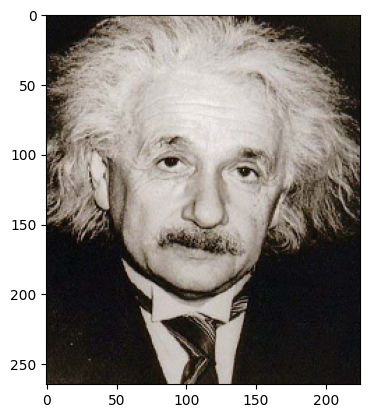

In [121]:
from PIL import Image
import matplotlib.pyplot as plt
image1 = Image.open(r"/content/einstein.bmp")

plt.imshow(image1)

(9, 9)
low frequency


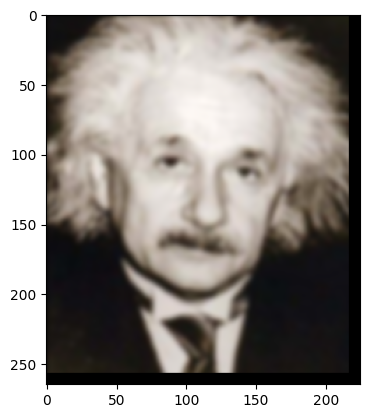

In [122]:


import numpy as np
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
import scipy
import os




''' Filtering and Hybrid Image construction '''
cutoff_frequency =2  # This is the standard deviation, in pixels
gaussian_filter = gauss2D(shape=(cutoff_frequency*4+1,cutoff_frequency*4+1), sigma = cutoff_frequency)
print(gaussian_filter.shape)
pad=((gaussian_filter.shape[0]-1)//2)

# 'high_frequencies' and then combine them to create 'hybrid_image'
# Remove the high frequencies from image1 by blurring it. The amount of
# blur that works best will vary with different image pairs

image2 = Image.open(r"/content/marilyn.bmp")

image2 = image2.resize((image1.size))

low_frequencies = convformorechannels(np.array(image1), np.array(gaussian_filter),pad);

# Remove the low frequencies from image2. The easiest way to do this is to
# subtract a blurred version of image2 from the original version of image2.
# This will give you an image centered at zero with negative values.
high_frequencies =np.array( image2) - convformorechannels(np.array(image2), np.array(gaussian_filter),pad)



# Combine the high frequencies and low frequencies

hybrid_image = low_frequencies+high_frequencies



''' Visualize and save outputs '''
plt.figure(1)
print('low frequency')
plt.imshow(normalize(low_frequencies))



high frequencies


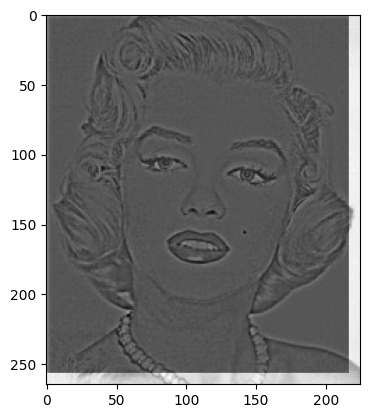

In [123]:
plt.figure(2)
print('high frequencies')
plt.imshow(normalize(high_frequencies+9.5))


hybrid image


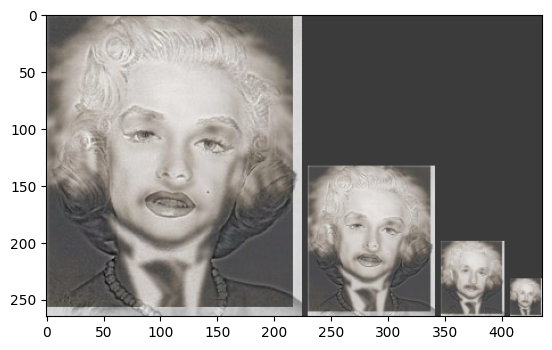

In [124]:
vis = vis_hybrid_image(hybrid_image)
print('hybrid image')
plt.figure(3)
plt.imshow(normalize(vis))
plt.show()

456


<ipython-input-125-eb24a3fd96fc>:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  blur_filter = blur_filter.astype(np.float) / np.sum(blur_filter);  # making the filter sum to 1


blur filter small


<Figure size 640x480 with 0 Axes>

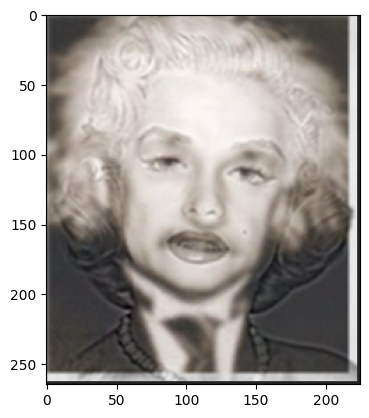

In [125]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

test_image=hybrid_image
test_image=np.array(test_image)

''' Identify filter '''
# This filter should do nothing regardless of the padding method you use.
identity_filter = np.array([[0,0,0], [0,1,0], [0,0,0]], dtype=np.single)
identity_image  = convformorechannels(test_image, identity_filter,1);
plt.figure('Identity')
print(456)

''' Small blur with a box filter '''
# This filter should remove some high frequencies
blur_filter = np.array([[1,1,1], [1,1,1], [1,1,1]])
blur_filter = blur_filter.astype(np.float) / np.sum(blur_filter);  # making the filter sum to 1
blur_image = convformorechannels(test_image, blur_filter,1)
print('blur filter small')
plt.figure('Box filter')
plt.imshow(normalize(blur_image))



gaussian filter large blur


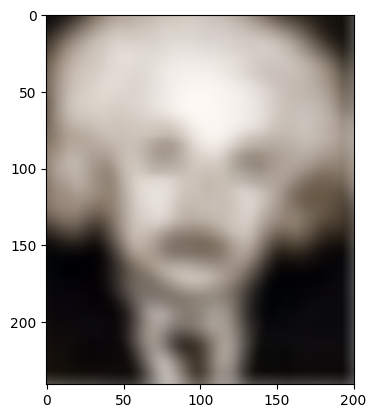

In [126]:
''' Large blur '''
#This blur would be slow to do directly, so we instead use the fact that
#Gaussian blurs are separable and blur sequentially in each direction.
large_2d_blur_filter = gauss2D(shape=(25,25), sigma = 10)
large_blur_image = convformorechannels(test_image, large_2d_blur_filter);
print('gaussian filter large blur')

plt.figure('Gauss filter')
plt.imshow(normalize(large_blur_image))




sobel filter 


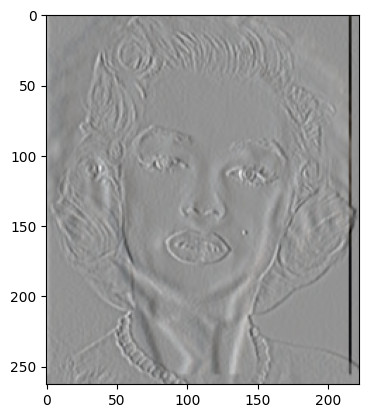

In [127]:
''' Oriented filter (Sobel Operator) '''
sobel_filter = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
sobel_image = convformorechannels(test_image, sobel_filter);
print('sobel filter ')
#0.5 added because the output image is centered around zero otherwise and mostly black
plt.figure('Sobel filter')
plt.imshow(normalize(sobel_image+0.5))




high_pass filter laplacian


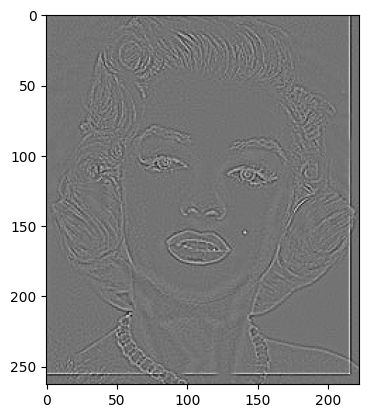

In [128]:
''' High pass filter (Discrete Laplacian) '''
laplacian_filter = np.array([[0,1,0], [1,-4,1], [0,1,0]])
laplacian_image = convformorechannels(test_image, laplacian_filter);
print('high_pass filter laplacian')

plt.figure('Laplacian filter')
plt.imshow(normalize(laplacian_image+0.5))




high_pass filter alternative


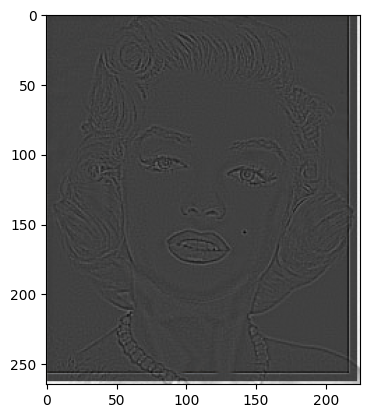

done


In [129]:
''' High pass "filter" alternative '''
high_pass_image = test_image - blur_image; #simply subtract the low frequency content
print('high_pass filter alternative')
plt.figure('High pass filter')
plt.imshow(normalize(high_pass_image+0.5))
plt.show()
print('done')